In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def load_data(csv_file_name: str) -> pd.DataFrame:
    return pd.read_csv(
        csv_file_name,
        header=None,
        names=['Step', 'Cooperator Rate', 'Mean Degree', 'Largest Component Size', 'Prosperity'],
        dtype={0: int, 1: float, 2: float, 3: int, 4: float},
        index_col=0
    )

In [3]:
%%time
raw_df = load_data("data/20220311_103838.csv")
raw_df["Generation"] = raw_df.index / 100 + 1
raw_df["Generation"] = raw_df["Generation"].round().astype(int)
raw_df.head()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CPU times: user 24.4 s, sys: 5.34 s, total: 29.7 s
Wall time: 27.9 s


,Cooperator Rate,Mean Degree,Largest Component Size,Prosperity,Generation
Step,,,,,
1,1.0,3.94,99,0.0550,1
2,1.0,3.96,99,0.0541,1
3,1.0,4.02,99,0.0545,1
4,1.0,3.96,99,0.0552,1
5,1.0,3.86,99,0.0541,1


In [4]:
%%time
small_df = raw_df.head(3 * 10**6).groupby(['Generation']).mean()
small_df.head()

CPU times: user 95 ms, sys: 24.5 ms, total: 120 ms
Wall time: 118 ms


,Cooperator Rate,Mean Degree,Largest Component Size,Prosperity
Generation,,,,
1,1.0,4.050612,95.489796,0.055716
2,1.0,4.079208,75.396040,0.056111
3,1.0,4.748687,34.555556,0.066231
4,1.0,4.153267,20.811881,0.057365
5,1.0,5.313131,19.292929,0.074501


CPU times: user 1.71 s, sys: 12 ms, total: 1.72 s
Wall time: 1.72 s


<AxesSubplot:xlabel='Generation', ylabel='Prosperity'>

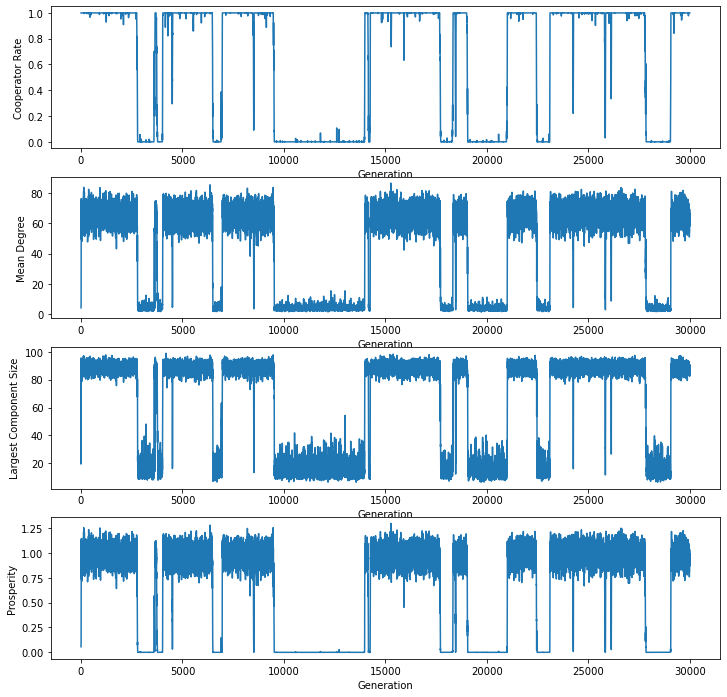

In [5]:
%%time
fig, axes = plt.subplots(nrows=4, figsize=(12.0, 12.0))
sns.lineplot(data=small_df, x="Generation", y="Cooperator Rate", ax=axes[0])
sns.lineplot(data=small_df, x="Generation", y="Mean Degree", ax=axes[1])
sns.lineplot(data=small_df, x="Generation", y="Largest Component Size", ax=axes[2])
sns.lineplot(data=small_df, x="Generation", y="Prosperity", ax=axes[3])